## Machine Learning Classifaction
1. Support Vector Machine SVM

One of the advantages of sVM is that it is very effective in high dimensional spaces. 

We will not use PCA on the training sets to reduce the number of dimensions for SVM.

In [1]:
from sklearn import svm
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import train_test_split
from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import chi2
from sklearn.ensemble import ExtraTreesClassifier
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
#The Background Dataset
background = pd.read_csv('./datasets/training/background-giants.csv')

#Dropping the unuseful objID that comes with CrossID
background = background.drop(['objID','objID1','ra','dec'], axis=1)
background.head()

,psfMag_u0,psfMag_g0,psfMag_r0,psfMag_i0,psfMag_z0,fiberMag_u0,fiberMag_g0,fiberMag_r0,fiberMag_i0,fiberMag_z0,...,fracDeV_u,fracDeV_g,fracDeV_r,fracDeV_i,fracDeV_z,dered_u,dered_g,dered_r,dered_i,dered_z
0,21.08928,19.37086,18.25864,17.81117,17.51476,21.25800,19.36015,18.24822,17.80149,17.45830,...,1.000000,1.000000,1.000000,1.000000,1.000000,20.13362,18.32410,17.19614,16.74197,16.40898
1,21.41094,19.66853,19.04671,18.49730,18.12082,21.32957,19.64395,18.69971,18.21872,17.81517,...,0.000000,0.048899,0.111197,0.102860,0.200284,18.94811,17.26758,16.39990,15.94577,15.60334
2,21.27979,19.46498,18.33810,17.92343,17.63418,21.25036,19.44884,18.34415,17.88955,17.55409,...,1.000000,1.000000,1.000000,1.000000,1.000000,20.15441,18.22609,17.11155,16.65807,16.33635
3,20.79575,18.89698,17.82768,17.38629,17.21747,20.79277,18.79881,17.79642,17.37555,17.02053,...,1.000000,0.930281,0.932025,0.997685,1.000000,19.56097,17.58059,16.57519,16.14223,15.82258
4,19.69155,17.76127,16.98154,16.55225,16.24577,19.77281,17.82529,16.89516,16.47335,16.13554,...,0.951221,0.916555,0.941605,0.954829,0.975430,18.35271,16.36183,15.47458,15.03607,14.70395


In [3]:
#The Foreground Dataset
foreground = pd.read_csv('./datasets/training/foreground-dwarfs.csv')

#Droping the unuseful objID that comes with CrossID
foreground = foreground.drop(['objID','objID1','ra','dec'], axis=1)
foreground.head()

,psfMag_u0,psfMag_g0,psfMag_r0,psfMag_i0,psfMag_z0,fiberMag_u0,fiberMag_g0,fiberMag_r0,fiberMag_i0,fiberMag_z0,...,fracDeV_u,fracDeV_g,fracDeV_r,fracDeV_i,fracDeV_z,dered_u,dered_g,dered_r,dered_i,dered_z
0,20.68459,20.32490,19.90491,19.65816,19.58863,20.93056,19.84648,19.39435,19.13173,18.93974,...,0.000000,0.000000,0.000000,0.000000,0.024766,17.14250,16.04856,15.63828,15.42416,15.29288
1,20.38590,18.79545,18.40734,18.01583,17.85035,20.31682,18.76537,18.05824,17.72758,17.45851,...,0.132033,0.252313,0.271305,0.262290,0.388589,18.42509,16.79932,16.11763,15.77143,15.49772
2,20.37486,19.15429,18.46381,18.16368,18.04567,20.36893,18.84602,18.14171,17.79829,17.57360,...,0.059789,0.199078,0.165721,0.215467,0.192362,18.37703,16.79943,16.09405,15.74896,15.51344
3,20.10566,18.50956,17.90357,17.60673,17.37036,20.09557,18.56411,17.81530,17.47781,17.24816,...,0.863581,0.726548,0.861712,0.876894,0.829082,17.90406,16.35933,15.61268,15.26653,15.02099
4,20.55464,18.93523,18.13289,17.79406,17.84563,20.42518,18.61701,17.89809,17.54489,17.28442,...,0.243175,0.357629,0.358013,0.392165,0.397820,18.33514,16.66942,15.94401,15.56867,15.34149


In [4]:
#Adding the column that labels these as the background
#In this case the label for background is 0 and 
#foreground will be 1
background['label'] = 0
foreground['label'] = 1

In [5]:
# The foreground and background sets now have to be concated together and have the label column removed as a seperate 
# array to perform SVM.
training_combine = pd.concat([foreground,background])
training_combine.head()

,psfMag_u0,psfMag_g0,psfMag_r0,psfMag_i0,psfMag_z0,fiberMag_u0,fiberMag_g0,fiberMag_r0,fiberMag_i0,fiberMag_z0,...,fracDeV_g,fracDeV_r,fracDeV_i,fracDeV_z,dered_u,dered_g,dered_r,dered_i,dered_z,label
0,20.68459,20.32490,19.90491,19.65816,19.58863,20.93056,19.84648,19.39435,19.13173,18.93974,...,0.000000,0.000000,0.000000,0.024766,17.14250,16.04856,15.63828,15.42416,15.29288,1
1,20.38590,18.79545,18.40734,18.01583,17.85035,20.31682,18.76537,18.05824,17.72758,17.45851,...,0.252313,0.271305,0.262290,0.388589,18.42509,16.79932,16.11763,15.77143,15.49772,1
2,20.37486,19.15429,18.46381,18.16368,18.04567,20.36893,18.84602,18.14171,17.79829,17.57360,...,0.199078,0.165721,0.215467,0.192362,18.37703,16.79943,16.09405,15.74896,15.51344,1
3,20.10566,18.50956,17.90357,17.60673,17.37036,20.09557,18.56411,17.81530,17.47781,17.24816,...,0.726548,0.861712,0.876894,0.829082,17.90406,16.35933,15.61268,15.26653,15.02099,1
4,20.55464,18.93523,18.13289,17.79406,17.84563,20.42518,18.61701,17.89809,17.54489,17.28442,...,0.357629,0.358013,0.392165,0.397820,18.33514,16.66942,15.94401,15.56867,15.34149,1


https://towardsdatascience.com/feature-selection-techniques-in-machine-learning-with-python-f24e7da3f36e

We need to do some feature engineering before building a model:
1. Univariate Selection
2. Feature Importance
3. Correlation Matrix with Heatmap


* check for correlation 
* select the important parameters
* try to understand the data for the feature engineering

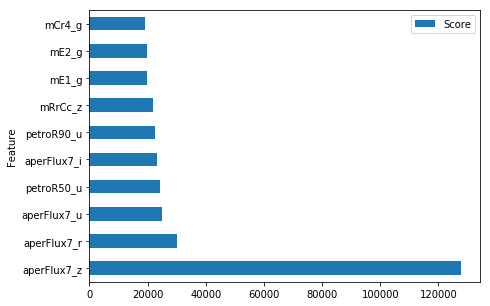

In [6]:
# Univariate selection can be used to select those features that have the strongest relationship with the output 
# variable.
galaxies = training_combine
X = galaxies.drop(['label'], axis=1) # Independent columns
X = X.abs() # Removing negative values
y = galaxies['label'] # Target column, galaxy type

# Applying SelectKBest to extract top 10 best features
best_features = SelectKBest(score_func=chi2, k=10)
fit = best_features.fit(X, y)
dfscores = pd.DataFrame(fit.scores_)
dfcolumns = pd.DataFrame(X.columns)
features_scores = pd.concat([dfcolumns, dfscores], axis=1) # Concatenate dataframes for better visualization
features_scores.columns = ['Feature', 'Score'] # Naming dataframe columns
features_scores.nlargest(10, 'Score').plot(x='Feature', y='Score', kind='barh', figsize=(7, 5))
plt.show()
# print(features_scores.nlargest(10, 'Score')) # Print 10 best features

/Users/danrachou/Documents/anaconda3/lib/python3.6/site-packages/sklearn/ensemble/forest.py:246: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)


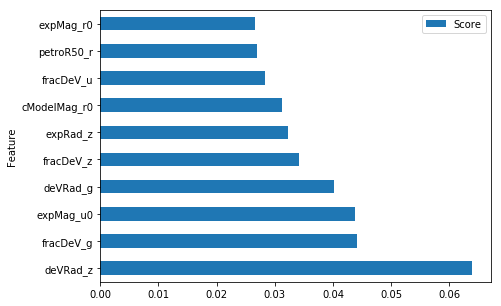

In [7]:
# Feature importance gives you a score for each feature of your data, the higher the score more important or relevant
# is the feature towards your output variable.
X = galaxies.drop(['label'], axis=1) # Independent columns
y = galaxies['label'] # Target column, galaxy type
model = ExtraTreesClassifier()
model.fit(X, y)

# Plot graph of feature importances to for better visualization
# feature_importances_ is a inbuilt class
#feat_importances = pd.Series(model.feature_importances_, index=X.columns)
dfscores = pd.DataFrame(model.feature_importances_)
dfcolumns = pd.DataFrame(X.columns)
feat_importances = pd.concat([dfcolumns, dfscores], axis=1)
feat_importances.columns = ['Feature', 'Score']
feat_importances.nlargest(10, 'Score').plot(x='Feature', y='Score', kind='barh', figsize=(7, 5))
plt.show()

In [8]:
# Features for heatmap:
features = pd.concat([features_scores.nlargest(10, 'Score'), feat_importances.nlargest(10, 'Score')])
features = features.sort_values('Feature')
features['Feature']

123     aperFlux7_i
122     aperFlux7_r
120     aperFlux7_u
124     aperFlux7_z
117    cModelMag_r0
86         deVRad_g
89         deVRad_z
112       expMag_r0
110       expMag_u0
104        expRad_z
126       fracDeV_g
125       fracDeV_u
129       fracDeV_z
61           mCr4_g
46            mE1_g
51            mE2_g
59          mRrCc_z
27       petroR50_r
25       petroR50_u
30       petroR90_u
Name: Feature, dtype: object

fig, ax = plt.subplots(figsize=(20,20))  
ax = sns.heatmap(
    corr, 
    vmin=-1, vmax=1, center=0,
    cmap=sns.diverging_palette(20, 220, n=200),
    square=True
)
ax.set_xticklabels(
    ax.get_xticklabels(),
    rotation=45,
    horizontalalignment='right'
);

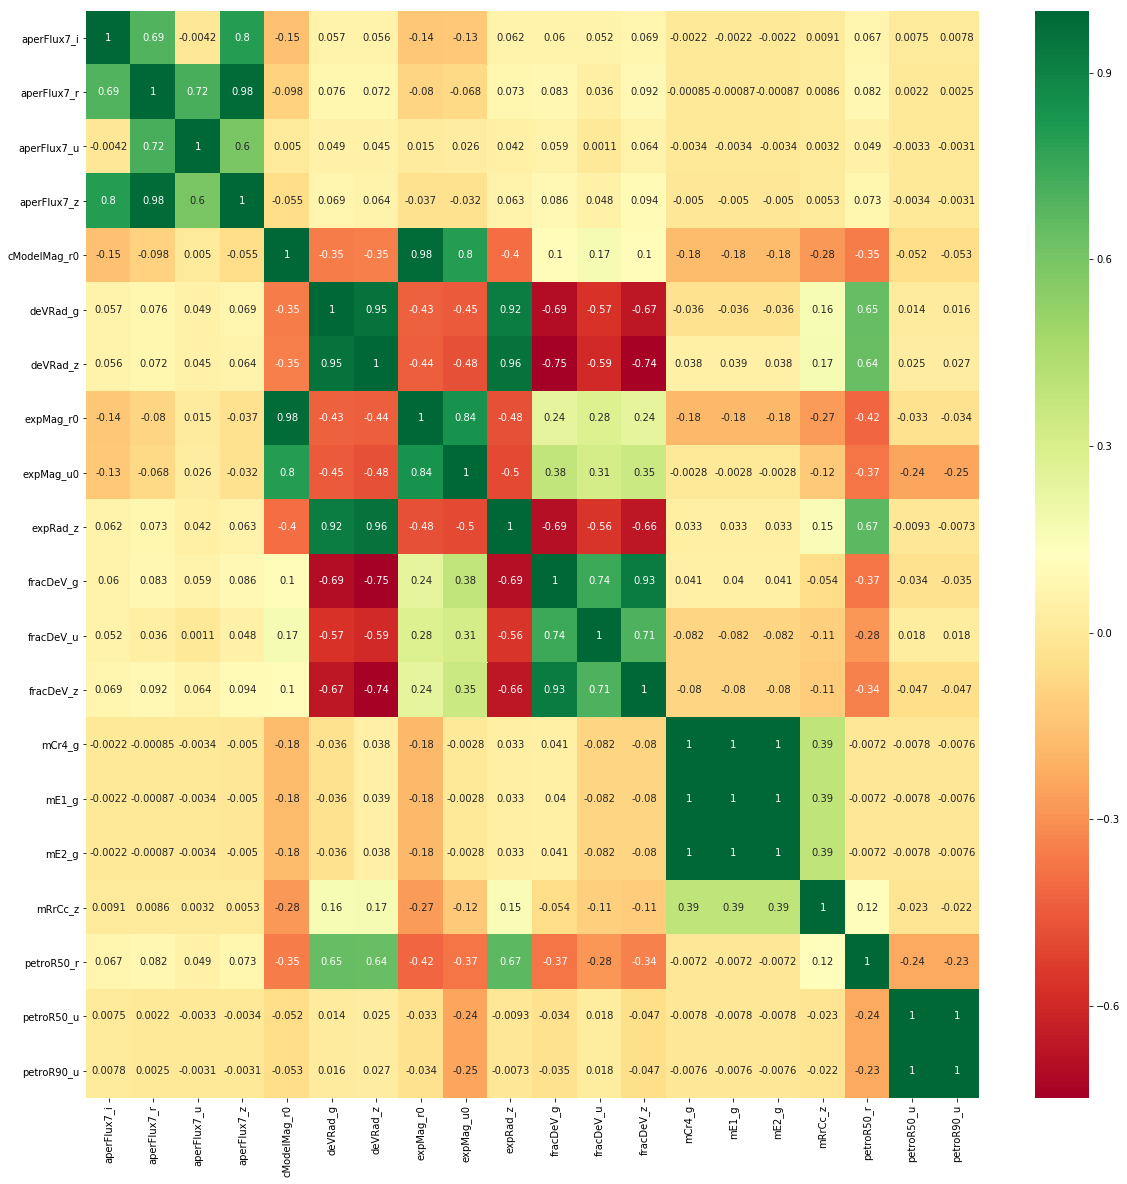

In [9]:
# Correlation Matrix with Heatmap
corrmat = galaxies[features['Feature']].corr()
top_corr_features = corrmat.index
plt.figure(figsize=(20,20))
g=sns.heatmap(galaxies[top_corr_features].corr(),annot=True,cmap="RdYlGn")

In [10]:
# Parameter tuning using GridSearchCV
def svc_param_selection(X, y):
    Cs = [0.001, 0.01, 0.1, 1, 10]
    gammas = [0.001, 0.01, 0.1, 1, 10]
    nfolds = 5
    param_grid = {'C': Cs, 'gamma': gammas}
    grid_search = GridSearchCV(svm.SVC(kernel='rbf'), param_grid, cv=nfolds)
    grid_search.fit(X, y)
    return grid_search.best_params_

### All Features
Training ML model on all features of the dataset.

In [11]:
#The two seperate array used in SVM to construct a predicting model
X = training_combine.drop('label',1)
y = training_combine['label']

In [12]:
# Cross validation
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)
X_train.shape, y_train.shape

((470, 135), (470,))

In [13]:
X_test.shape, y_test.shape

((118, 135), (118,))

In [14]:
svc_param_selection(X, y)

{'C': 1, 'gamma': 0.001}

In [15]:
# Using the default kernel type which is a Gaussian
clf = svm.SVC(C=1, gamma=0.001)
# Fitting the model and it can now be used to predict labels if we feed it a dataframe with the same columns
clf.fit(X_train, y_train)
clf.score(X_test, y_test)

0.9067796610169492

In [16]:
# Using sigmoid kernel
sigmoidModel = svm.SVC(C=1, gamma=0.001, kernel='sigmoid')
sigmoidModel.fit(X_train, y_train)
sigmoidModel.score(X_test, y_test)

0.6779661016949152

In [17]:
# Using polynomial kernel of different degrees
polyModel = svm.SVC(C=1, gamma=0.001, kernel='poly', degree=1)
polyModel.fit(X_train, y_train)
polyModel.score(X_test, y_test)

0.9491525423728814

In [18]:
polyModel = svm.SVC(C=1, gamma=0.001, kernel='poly', degree=2)
polyModel.fit(X_train, y_train)
polyModel.score(X_test, y_test)

0.8728813559322034

In [19]:
polyModel = svm.SVC(C=1, gamma=0.001, kernel='poly', degree=3)
polyModel.fit(X_train, y_train)
polyModel.score(X_test, y_test)

0.8813559322033898

### 10/10 Features
Training the model on 10 of the best scoring features and 10 of most important features.

In [20]:
X = galaxies[features['Feature']]
y = galaxies['label']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)
X_train.shape, y_train.shape

((470, 20), (470,))

In [21]:
X_test.shape, y_test.shape

((118, 20), (118,))

In [22]:
svc_param_selection(X, y)

{'C': 1, 'gamma': 0.001}

In [23]:
clf = svm.SVC(C=1, gamma=0.001)
clf.fit(X_train, y_train)
clf.score(X_test, y_test)

0.923728813559322

We see accuracy improvement of 0.03% of the Gaussian kernel after some feature engineering.

In [24]:
# Using sigmoid kernel
sigmoidModel = svm.SVC(C=1, gamma=0.001, kernel='sigmoid')
sigmoidModel.fit(X_train, y_train)
sigmoidModel.score(X_test, y_test)

0.6864406779661016

In [25]:
# Using polynomial kernel of different degrees
polyModel = svm.SVC(C=1, gamma=0.001, kernel='poly', degree=1)
polyModel.fit(X_train, y_train)
polyModel.score(X_test, y_test)

0.940677966101695

In [26]:
polyModel = svm.SVC(C=1, gamma=0.001, kernel='poly', degree=2)
polyModel.fit(X_train, y_train)
polyModel.score(X_test, y_test)

0.9491525423728814

In [27]:
# Takes a really long time...
#polyModel = svm.SVC(C=1, gamma=0.001, kernel='poly', degree=3)
#polyModel.fit(X_train, y_train)
#polyModel.score(X_test, y_test)

In [28]:
#We now grab the test data which is the Perseus cluster csv file retrieved from SDSS
base_test = pd.read_csv('./datasets/test/perseus.csv')

#Strip all the unusefull data and format it to be usefull in SDSS CrossID
cross_id_test = base_test

#Export formated file to be used in SDSS CrossID
cross_id_test.to_csv(r'./machine-learning-sets/testData_crossID.csv', index=False)

#After doing CrossID, importing the Testing Dataset
test_Data = pd.read_csv('./machine-learning-sets/testData_crossID.csv')

#Droping the unuseful objID that comes with CrossID
test_Data = test_Data.drop(['ra','dec'], axis=1)

test_Data.head()

,psfMag_u0,psfMag_g0,psfMag_r0,psfMag_i0,psfMag_z0,fiberMag_u0,fiberMag_g0,fiberMag_r0,fiberMag_i0,fiberMag_z0,...,fracDeV_u,fracDeV_g,fracDeV_r,fracDeV_i,fracDeV_z,dered_u,dered_g,dered_r,dered_i,dered_z
0,20.35019,18.73038,18.13181,17.79124,17.61852,20.28010,18.66158,17.93344,17.60951,17.30111,...,0.173596,0.250951,0.270072,0.286627,0.474151,18.35082,16.55130,15.82822,15.47761,15.18149
1,17.65375,16.13538,15.59801,15.37027,15.33475,17.82089,16.31893,15.79564,15.56291,15.54404,...,0.337553,0.955662,0.957910,0.986581,1.000000,17.41558,15.91563,15.40834,15.16885,15.17474
2,20.96273,19.13077,18.23058,17.76802,17.42493,21.04678,19.08323,18.05112,17.63207,17.27019,...,1.000000,1.000000,1.000000,1.000000,1.000000,19.86766,17.63688,16.60410,16.15743,15.81193
3,18.47823,17.34176,17.00827,16.98004,16.95284,18.75081,17.48507,17.08183,16.93917,16.87666,...,1.000000,0.949693,0.000000,0.713607,0.000000,18.36897,17.18445,16.75123,16.72402,16.64120
4,19.03154,17.27477,16.57897,16.11878,15.78047,18.82043,16.97664,16.15818,15.77295,15.46045,...,0.658810,0.745367,0.716180,0.785168,0.804662,17.28795,15.40522,14.62902,14.19722,13.88850


In [29]:
#Time for the predict, remember that 1 means foreground and 0 means background
#clf = model.predict(test_Data)
#scores = cross_val_score(clf, iris.data, iris.target, cv=5)
#print('Number of foregrounds with gauss kernel: {}'.format(np.count_nonzero(clf == 1)))
#print('Number of backgrounds with gauss kernel: {}'.format(np.count_nonzero(clf == 0)))

In [30]:
#Iteration of the model using the sigmoid kernel rather than the rbf gaussian one
#sigmoidModel = svm.SVC(gamma='auto', kernel='sigmoid')
#sigmoidModel.fit(samples,labels)
#sigResults = sigmoidModel.predict(test_Data)
#print('Number of foregrounds with sigmoid kernel: {}'.format(np.count_nonzero(sigResults == 1)))
#print('Number of backgrounds with sigmoid kernel: {}'.format(np.count_nonzero(sigResults == 0)))

In [31]:
#Iteration of the model using a polynomial kernel of degree, d
#d = 5
#for n in range(1,d+1):
#    polyModel = svm.SVC(gamma='auto', kernel='poly', degree=n)
#    polyModel.fit(samples,labels)
#    polyResults = polyModel.predict(test_Data)
#    print('Number of foregrounds with poly kernel at degree {}: {}'.format(n,np.count_nonzero(polyResults == 1)))
#    print('Number of backgrounds with poly kernel degree {}: {}'.format(n,np.count_nonzero(polyResults == 0)))
#    print('----------------------------------------------------------------------------------------------------')

In [32]:
#print(polyResults)